In [1]:
# Importation des librairies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import hex2color

import seaborn as sns
import plotly.express as px

import datetime as dt
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
conf_graph = {
  'set_style': {
    'axes.spines.bottom': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.grid': True,
    'grid.color': '.9'},
  'title_style': {
    'loc': 'left',
    'fontsize': 20,
    'fontweight': 'bold',
    'color': '#000000'},
  'label_style': {
    'fontsize': 15,
    'fontweight': 'bold',
    'color': '#000000'},
  'tick_style': {
    'fontsize': 10,
    'fontweight': 'bold',
    'color': '#000000'},
  'rotation': {
    'rotation': '20',
    'horizontalalignment': 'right'},
  'legend_style': {
      'weight': 'bold',
      'size': 10},
  'dscolors': {
    'pink': '#DA9BEA',
    'lilac': '#959FF5',
    'blue': '#4FD7DB',
    'green': '#89F594',
    'yellow': '#EBEA8A',
    'orange': '#FAC19D'}}

sns.set_style("white", conf_graph['set_style'])
palette = sns.color_palette(list(conf_graph['dscolors'].values()))


def NonLinCdict(steps, hexcol_array):
    """Fonction pour faire un mapping de couleur pour seaborn."""
    cdict = {'yellow': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = hex2color(hexcol)
        cdict['yellow'] = cdict['yellow'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)

    return cdict


cdict = NonLinCdict([0, 1], palette)
cm = LinearSegmentedColormap('MDM', cdict)

##### Description des emplois salariés en 2018

https://www.insee.fr/fr/statistiques/5366604

In [3]:
df_salarie=pd.read_csv('df_salarie_full.csv')
df_salarie

,Activité_6,Salaire_net,Age,Temps_travail,Catégorie_SP,Sexe,Type_contrat
0,"Administration publique, enseignement, santé h...",7,18,Temps complet,Agents de surveillance,Homme,Autre type de contrat
1,"Administration publique, enseignement, santé h...",6,18,Temps complet,Agents de surveillance,Homme,Autre type de contrat
2,"Administration publique, enseignement, santé h...",6,18,Temps complet,Agents de surveillance,Homme,Autre type de contrat
3,"Administration publique, enseignement, santé h...",14,18,Temps complet,Agents de surveillance,Homme,Autre type de contrat
4,"Administration publique, enseignement, santé h...",13,18,Temps complet,Agents de surveillance,Homme,Autre type de contrat
...,...,...,...,...,...,...,...
2175639,"Commerce de gros et de détail, transports, héb...",13,26,Temps complet,Personnels des services directs aux particuliers,Homme,CDI
2175640,"Administration publique, enseignement, santé h...",12,42,Temps complet,Personnels des services directs aux particuliers,Femme,CDI
2175641,"Commerce de gros et de détail, transports, héb...",7,17,Temps complet,Ouvriers non qualifiés de type artisanal,Homme,Contrat d'apprentissage
2175642,"Commerce de gros et de détail, transports, héb...",16,53,Temps complet,Ouvriers qualifiés de type artisanal,Homme,CDI


# Introduction

## a) Répartition des emplois salariés selon le genre

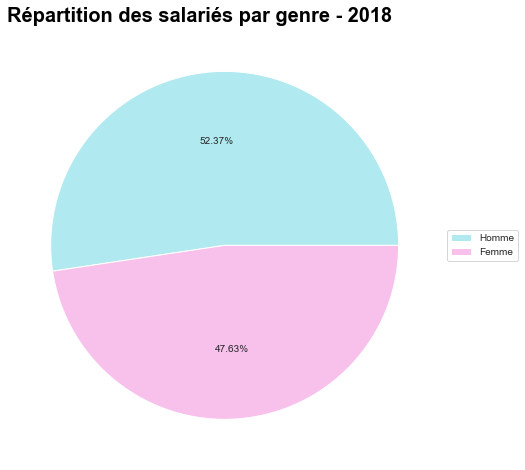

In [4]:
plt.figure(figsize = (12,8))
plt.pie(df_salarie["Sexe"].value_counts(), autopct = "%0.2f%%", colors=["#B1E9F0","#F7C1EC"])
plt.title("Répartition des salariés par genre - 2018", **conf_graph["title_style"])
plt.legend(df_salarie["Sexe"].value_counts().index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('01_pie_sexe.jpeg')
plt.show()

## b) Répartition par secteur d'activité

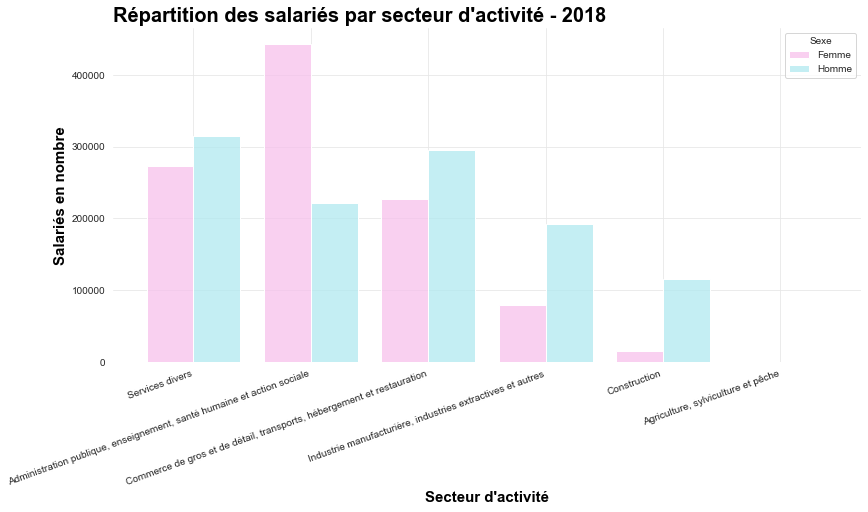

In [5]:
df_graph=df_salarie.copy()
df_graph=df_graph.sort_values("Sexe")

plt.figure(figsize=(16,8))
plt.gcf().subplots_adjust(bottom=0.3, left=0.25)

sns.histplot(df_graph, x="Activité_6", shrink=0.8, hue="Sexe", multiple="dodge", palette=["#F7C1EC","#B1E9F0"])
plt.title("Répartition des salariés par secteur d'activité - 2018", **conf_graph["title_style"])
plt.xlabel("Secteur d'activité", **conf_graph["label_style"])
plt.ylabel("Salariés en nombre", **conf_graph["label_style"])
plt.xticks(**conf_graph["rotation"])

plt.savefig('02_bar_activité_sexe.png')
plt.show()

del df_graph

In [6]:
# Calcul du % de femmes selon le secteur d'activité
x = "Activité_6"
y = "Sexe"

activite = df_salarie[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

activite["Ensemble"] = activite["Femme"] + activite["Homme"]
activite["% de femmes"] = (100*(activite["Femme"] / activite["Ensemble"])).round(2)
activite.sort_values('% de femmes', ascending=False)

Sexe,Femme,Homme,Ensemble,% de femmes
Activité_6,,,,
"Administration publique, enseignement, santé humaine et action sociale",443164,221233,664397,66.70
Services divers,272243,315088,587331,46.35
"Commerce de gros et de détail, transports, hébergement et restauration",226620,294648,521268,43.47
"Agriculture, sylviculture et pêche",221,532,753,29.35
"Industrie manufacturière, industries extractives et autres",79269,192326,271595,29.19
Construction,14714,115586,130300,11.29


# I) Embauche

## I.a) Répartition selon l'âge

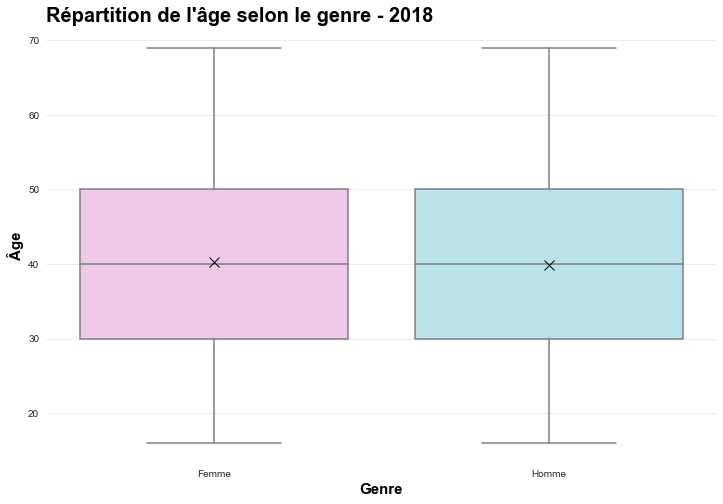

In [7]:
#Représentation des âges selon leur genre
df_graph=df_salarie.copy()
df_graph=df_graph.sort_values("Sexe")

plt.figure(figsize=(12,8))
sns.boxplot(x = 'Sexe', y = 'Age', data=df_graph, palette=["#F7C1EC","#B1E9F0"],
            showmeans=True,meanprops={"marker": "x","markeredgecolor": "black","markersize": "10"})
plt.title("Répartition de l'âge selon le genre - 2018", **conf_graph["title_style"])
plt.xlabel('Genre', **conf_graph["label_style"])
plt.ylabel('Âge', **conf_graph["label_style"])

plt.savefig('04_box_age_sex.jpeg')
plt.show()

del df_graph

In [8]:
# Affichage des mesures centrales et de dispersion concernant l'âge
age = df_salarie.groupby(['Sexe']).describe()
age = age["Age"].copy()
age

,count,mean,std,min,25%,50%,75%,max
Sexe,,,,,,,,
Femme,1036231.0,40.329479,12.340453,16.0,30.0,40.0,50.0,69.0
Homme,1139413.0,39.877464,12.370899,16.0,30.0,40.0,50.0,69.0


In [9]:
#Oneway ANOVA via STATSMODELS 
model = ols('Age ~ Sexe',data = df_salarie).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq         df           F         PR(>F)
Sexe      1.108804e+05        1.0  726.223575  6.305933e-160
Residual  3.321788e+08  2175642.0         NaN            NaN


## I.b) Répartition par catégorie socio professionnelle

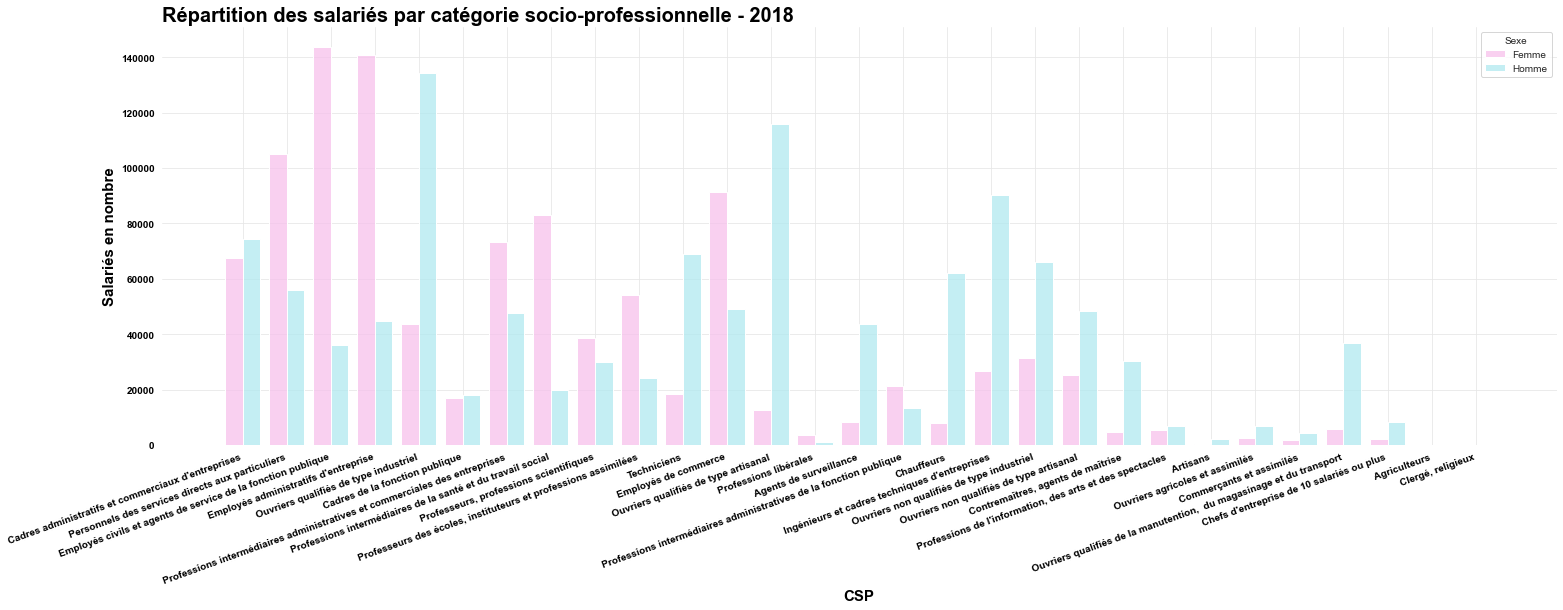

In [10]:
df_graph=df_salarie.copy()
df_graph=df_graph.sort_values("Sexe")

plt.figure(figsize=(25,10))
plt.gcf().subplots_adjust(bottom=0.3)

sns.histplot(df_graph, x="Catégorie_SP", shrink=0.8, hue="Sexe", multiple="dodge", palette=["#F7C1EC","#B1E9F0"])
plt.title("Répartition des salariés par catégorie socio-professionnelle - 2018", **conf_graph["title_style"])
plt.xlabel("CSP", **conf_graph["label_style"])
plt.ylabel("Salariés en nombre", **conf_graph["label_style"])
plt.xticks(**conf_graph["tick_style"], **conf_graph["rotation"])
plt.yticks(**conf_graph["tick_style"])

plt.savefig('03_bar_csp_sexe.png')
plt.show()

del df_graph

In [11]:
 # Calcul du % de femmes selon la catégorie socio professionnelle
x = "Catégorie_SP"
y = "Sexe"

categ = df_salarie[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

categ["Ensemble"] = categ["Femme"] + categ["Homme"]
categ["% de femmes"] = (100*(categ["Femme"] / categ["Ensemble"])).round(2)
categ.sort_values("% de femmes")

Sexe,Femme,Homme,Ensemble,% de femmes
Catégorie_SP,,,,
Ouvriers qualifiés de type artisanal,12493,115766,128259,9.74
Chauffeurs,7761,62044,69805,11.12
Artisans,312,2262,2574,12.12
"Contremaîtres, agents de maîtrise",4559,30421,34980,13.03
"Ouvriers qualifiés de la manutention, du magasinage et du transport",5732,36871,42603,13.45
Agents de surveillance,8415,43776,52191,16.12
Chefs d'entreprise de 10 salariés ou plus,2068,8444,10512,19.67
Techniciens,18425,69077,87502,21.06
Ingénieurs et cadres techniques d'entreprises,26602,90109,116711,22.79


In [12]:
categ.sort_values('% de femmes', ascending=False)

Sexe,Femme,Homme,Ensemble,% de femmes
Catégorie_SP,,,,
Professions intermédiaires de la santé et du travail social,83183,19684,102867,80.86
Employés civils et agents de service de la fonction publique,143618,36175,179793,79.88
Professions libérales,3481,924,4405,79.02
Employés administratifs d'entreprise,140976,44579,185555,75.98
"Professeurs des écoles, instituteurs et professions assimilées",54291,24153,78444,69.21
Personnels des services directs aux particuliers,105196,55796,160992,65.34
Employés de commerce,91431,48969,140400,65.12
Professions intermédiaires administratives de la fonction publique,21315,13416,34731,61.37
Professions intermédiaires administratives et commerciales des entreprises,73408,47765,121173,60.58


- p_value <0,05 = corrélation, + f_statisitc élevé = corrélation forte

# II) Conditions de travail
## II.a) Répartition selon type de contrat

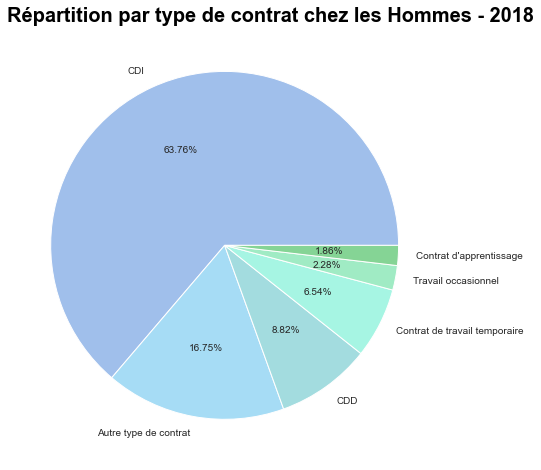

In [13]:
temp_men = df_salarie.loc[df_salarie["Sexe"].isin(["Homme"])] 

plt.figure(figsize = (12,8))
plt.pie(temp_men["Type_contrat"].value_counts(), labels=df_salarie["Type_contrat"].value_counts().index
        , autopct = "%0.2f%%", colors=["#A0BFEB","#A6DCF5","#A3DCDF","#A6F5E3","#A0EBC4","#85D495"])
plt.title("Répartition par type de contrat chez les Hommes - 2018", **conf_graph["title_style"])

plt.savefig('05_pie_contrats_men.jpeg')
plt.show()

In [14]:
contrat_men=temp_men.groupby(['Type_contrat']).count()
contrat_men["Répartition chez les hommes"]=(contrat_men["Sexe"]/contrat_men["Sexe"].sum()*100).round(2)
contrat_men=contrat_men[["Répartition chez les hommes"]]
contrat_men=contrat_men.sort_values("Répartition chez les hommes", ascending=False)
contrat_men

,Répartition chez les hommes
Type_contrat,
CDI,63.76
Autre type de contrat,16.75
CDD,8.82
Contrat de travail temporaire,6.54
Contrat d'apprentissage,2.28
Travail occasionnel,1.86


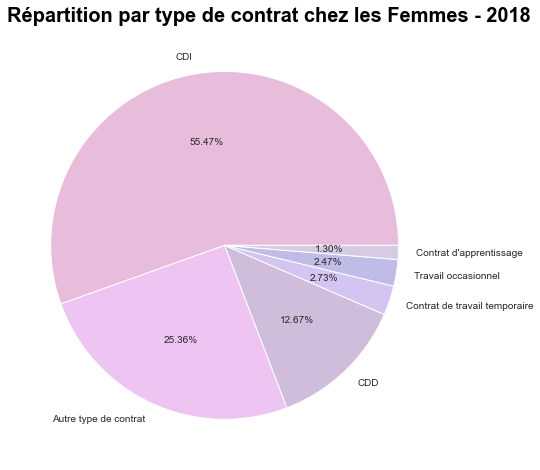

In [15]:
temp_wom = df_salarie.loc[df_salarie["Sexe"].isin(["Femme"])]

plt.figure(figsize = (12,8))
plt.pie(temp_wom["Type_contrat"].value_counts(), labels=df_salarie["Type_contrat"].value_counts().index
        , autopct = "%0.2f%%", colors=["#E8BCDB","#EDC4F2","#D0BDDC","#D4C4F2","#BFBCE8","#D5CCE3"])
plt.title("Répartition par type de contrat chez les Femmes - 2018", **conf_graph["title_style"])

plt.savefig('06_pie_contrats_wom.jpeg')
plt.show()

In [16]:
contrat_wom=temp_wom.groupby(['Type_contrat']).count()
contrat_wom["Répartition chez les femmes"]=(contrat_wom["Sexe"]/contrat_wom["Sexe"].sum()*100).round(2)
contrat_wom=contrat_wom[["Répartition chez les femmes"]]
contrat_wom=contrat_wom.sort_values('Répartition chez les femmes', ascending=False)
contrat_wom

,Répartition chez les femmes
Type_contrat,
CDI,55.47
Autre type de contrat,25.36
CDD,12.67
Contrat de travail temporaire,2.73
Travail occasionnel,2.47
Contrat d'apprentissage,1.30


In [17]:
contrat_wom["Répartition chez les hommes"]=contrat_men["Répartition chez les hommes"]
contrat_wom

,Répartition chez les femmes,Répartition chez les hommes
Type_contrat,,
CDI,55.47,63.76
Autre type de contrat,25.36,16.75
CDD,12.67,8.82
Contrat de travail temporaire,2.73,6.54
Travail occasionnel,2.47,1.86
Contrat d'apprentissage,1.30,2.28


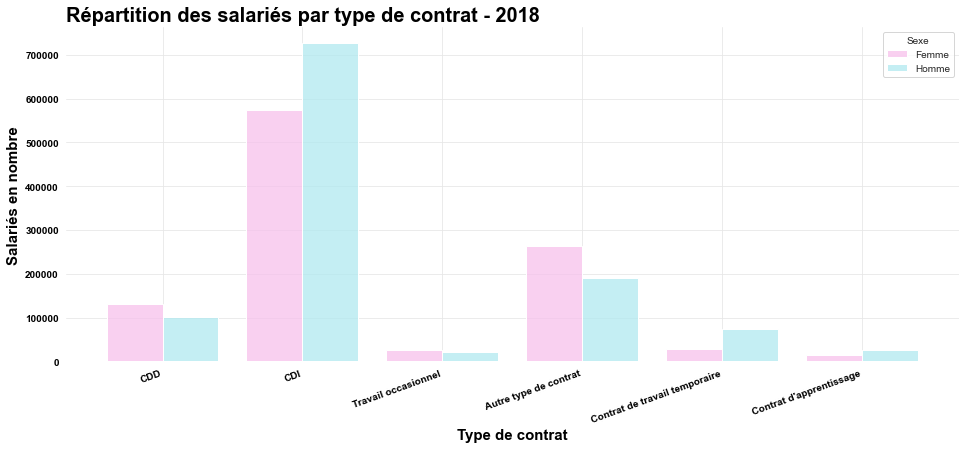

In [18]:
df_graph=df_salarie.copy()
df_graph=df_graph.sort_values("Sexe")

plt.figure(figsize=(16,8))
plt.gcf().subplots_adjust(bottom=0.3)

sns.histplot(df_graph, x="Type_contrat", shrink=0.8, hue="Sexe", multiple="dodge", palette=["#F7C1EC","#B1E9F0"])

plt.title("Répartition des salariés par type de contrat - 2018", **conf_graph["title_style"])
plt.xlabel("Type de contrat", **conf_graph["label_style"])
plt.ylabel("Salariés en nombre", **conf_graph["label_style"])
plt.xticks(**conf_graph["tick_style"], **conf_graph["rotation"])
plt.yticks(**conf_graph["tick_style"])

plt.savefig('07_bar_contrat_sexe.png')
plt.show()

del df_graph

In [19]:
# Calcul du % de femmes selon le type de contrat
x = "Type_contrat"
y = "Sexe"

contrat = df_salarie[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

contrat["Ensemble"] = contrat["Femme"] + contrat["Homme"]
contrat["% de femmes"] = (100*(contrat["Femme"] / contrat["Ensemble"])).round(2)
contrat["Ratio femmes / hommes"] = (contrat["Homme"]/contrat["Femme"]).round(2)
contrat["Ratio hommes / femmes"] = (contrat["Femme"]/contrat["Homme"]).round(2)
contrat.sort_values('% de femmes', ascending=False)

Sexe,Femme,Homme,Ensemble,% de femmes,Ratio femmes / hommes,Ratio hommes / femmes
Type_contrat,,,,,,
Autre type de contrat,262805,190803,453608,57.94,0.73,1.38
CDD,131253,100449,231702,56.65,0.77,1.31
Travail occasionnel,25571,21163,46734,54.72,0.83,1.21
CDI,574792,726491,1301283,44.17,1.26,0.79
Contrat d'apprentissage,13514,25953,39467,34.24,1.92,0.52
Contrat de travail temporaire,28296,74554,102850,27.51,2.63,0.38


In [20]:
del activite
del categ
del age
del contrat

## II.b) Répartition de la durée de travail 

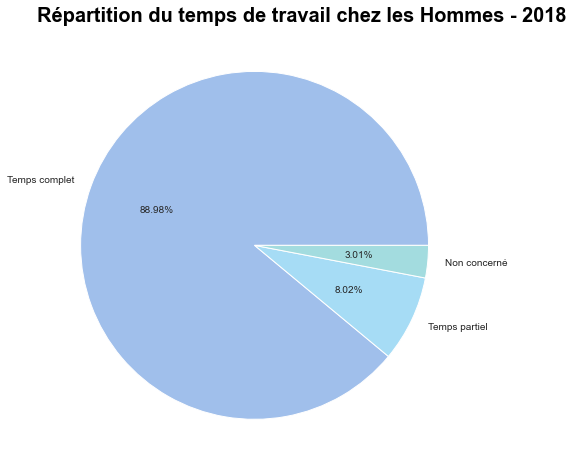

In [21]:
plt.figure(figsize = (12,8))
plt.pie(temp_men["Temps_travail"].value_counts(), labels=df_salarie["Temps_travail"].value_counts().index
        , autopct = "%0.2f%%", colors=["#A0BFEB","#A6DCF5","#A3DCDF"])
plt.title("Répartition du temps de travail chez les Hommes - 2018", **conf_graph["title_style"])

plt.savefig('08_pie_durée_men.png')
plt.show()

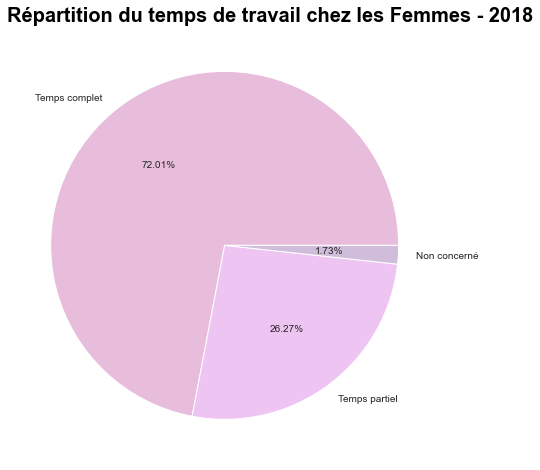

In [22]:
plt.figure(figsize = (12,8))
plt.pie(temp_wom["Temps_travail"].value_counts(), labels=df_salarie["Temps_travail"].value_counts().index
        , autopct = "%0.2f%%", colors=["#E8BCDB","#EDC4F2","#D0BDDC"])
plt.title("Répartition du temps de travail chez les Femmes - 2018", **conf_graph["title_style"])

plt.savefig('09_pie_durée_wom.png')
plt.show()

In [23]:
# Calcul du % de femmes selon le type de contrat
x = "Temps_travail"
y = "Sexe"

duree = df_salarie[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

duree["Ensemble"] = duree["Femme"] + duree["Homme"]
duree["% de femmes"] = (100*(duree["Femme"] / duree["Ensemble"])).round(2)
duree["Ratio femmes / hommes"] = (duree["Homme"]/duree["Femme"]).round(2)
duree["Ratio hommes / femmes"] = (duree["Femme"]/duree["Homme"]).round(2)

duree.sort_values('% de femmes', ascending=False)

Sexe,Femme,Homme,Ensemble,% de femmes,Ratio femmes / hommes,Ratio hommes / femmes
Temps_travail,,,,,,
Temps partiel,272181,91338,363519,74.87,0.34,2.98
Temps complet,746164,1013806,1759970,42.40,1.36,0.74
Non concerné,17886,34269,52155,34.29,1.92,0.52


## II.c) Relation entre le Type de contrat et la Durée de travail

In [24]:
x = "Temps_travail"
y = "Type_contrat"

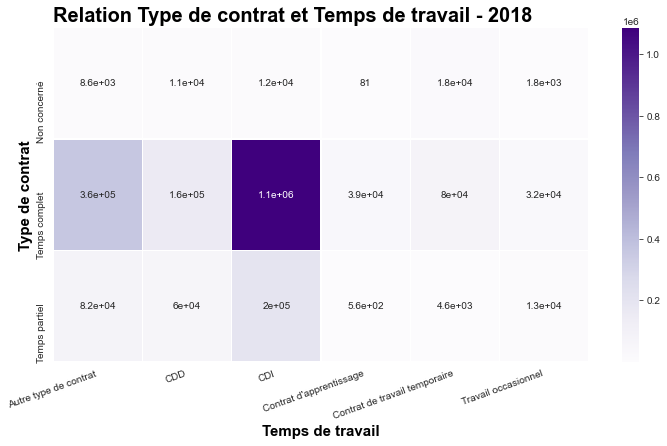

In [25]:
heat_all = df_salarie[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

plt.figure(figsize=(12,8))
plt.gcf().subplots_adjust(bottom=0.3)

sns.heatmap(heat_all, linewidths = 0.30, annot = True, cmap="Purples")
plt.title("Relation Type de contrat et Temps de travail - 2018", **conf_graph["title_style"])
plt.xlabel('Temps de travail', **conf_graph["label_style"])
plt.ylabel('Type de contrat', **conf_graph["label_style"])
plt.xticks(**conf_graph["rotation"])

plt.savefig('10_heat_all.png')
plt.show()

In [26]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(heat_all)
st_chi2

154250.1243571062

In [27]:
st_p

0.0

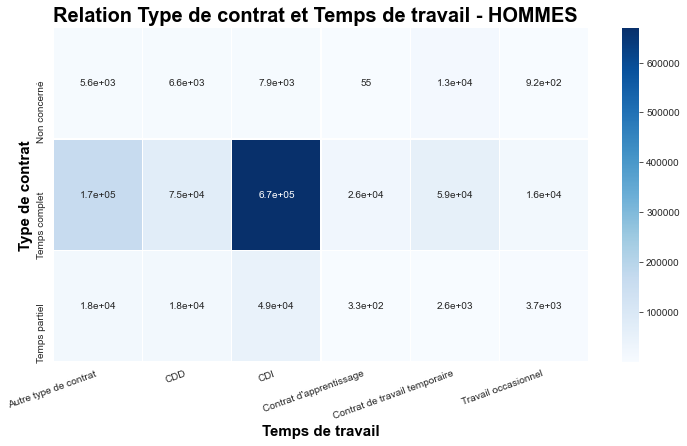

In [28]:
heat_men = temp_men[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

plt.figure(figsize=(12,8))
plt.gcf().subplots_adjust(bottom=0.3)

sns.heatmap(heat_men, linewidths = 0.30, annot = True, cmap="Blues")
plt.title("Relation Type de contrat et Temps de travail - HOMMES", **conf_graph["title_style"])
plt.xlabel('Temps de travail', **conf_graph["label_style"])
plt.ylabel('Type de contrat', **conf_graph["label_style"])
plt.xticks(**conf_graph["rotation"])

plt.savefig('11_heat_men.png')
plt.show()

In [29]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(heat_men)
st_chi2

92770.6130265953

In [30]:
st_p

0.0

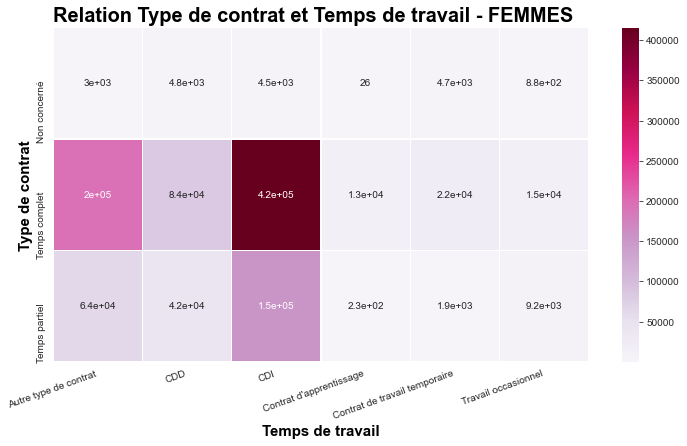

In [31]:
heat_wom = temp_wom[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

plt.figure(figsize=(12,8))
plt.gcf().subplots_adjust(bottom=0.3)

sns.heatmap(heat_wom, linewidths = 0.30, annot = True, cmap="PuRd")
plt.title("Relation Type de contrat et Temps de travail - FEMMES", **conf_graph["title_style"])
plt.xlabel('Temps de travail', **conf_graph["label_style"])
plt.ylabel('Type de contrat', **conf_graph["label_style"])
plt.xticks(**conf_graph["rotation"])

plt.savefig('12_heat_wom.png')
plt.show()

In [32]:
x = "Temps_travail"
y = "Type_contrat"

heat_wom = temp_wom[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(heat_wom)
st_chi2

55770.559773695866

In [33]:
st_p

0.0

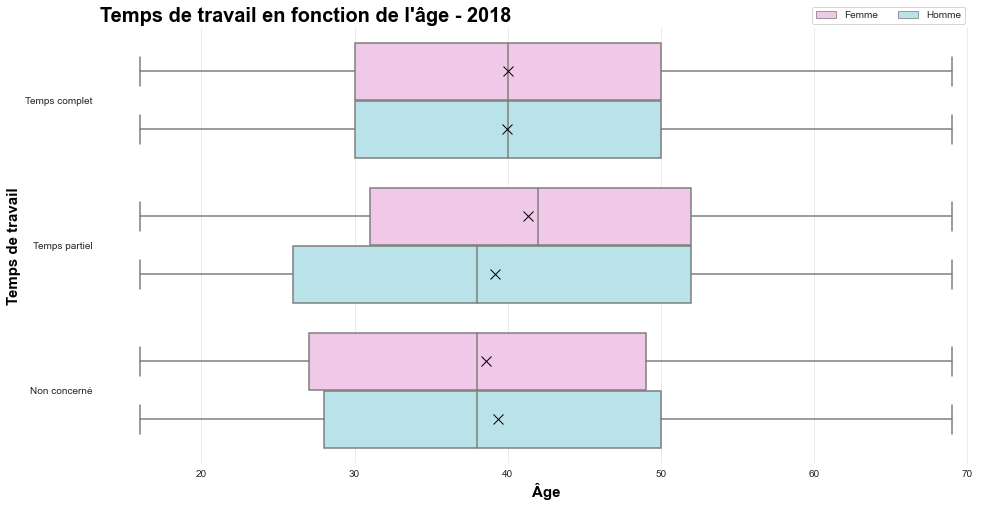

In [28]:
# Répartition des revenus selon le genre
df_graph=df_salarie.copy()
df_graph=df_graph.sort_values("Sexe")

plt.figure(figsize=(16,8))
sns.boxplot(x = 'Age', y = 'Temps_travail',hue='Sexe', data=df_graph,showmeans=True,
            meanprops={"marker": "x","markeredgecolor": "black","markersize": "10"}, palette=["#F7C1EC","#B1E9F0"])

plt.title("Temps de travail en fonction de l'âge - 2018", **conf_graph["title_style"])
plt.xlabel('Âge', **conf_graph["label_style"])
plt.ylabel('Temps de travail', **conf_graph["label_style"])
plt.legend(bbox_to_anchor =(0.975,1.06), ncol = 2)

plt.savefig('13_box_durée_age_sexe.png')
plt.show()

del df_graph

In [29]:
temp_wom['Age'][temp_wom['Temps_travail'] == 'Temps partiel'].mean()

41.300667570476996

In [30]:
temp_men['Age'][temp_men['Temps_travail'] == 'Temps partiel'].mean()

39.17337800258381

In [37]:
del heat_men
del heat_wom

# III) Rémunération
## III.a) Indice de Gini et courbe de Lorenz

In [38]:
# Cacul Lorenz ENSEMBLE + Gini
inc = df_salarie['Salaire_net'].values
n = len(inc)
lorenz = np.cumsum(np.sort(inc)) / inc.sum()
lorenz = np.append([0],lorenz) 
xaxis = np.linspace(0-1/n,1+1/n,n+1)

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini.round(4)

0.1908

In [39]:
# Cacul Lorenz MEN + Gini
inc = temp_men['Salaire_net'].values
n = len(inc)
lorenz_men = np.cumsum(np.sort(inc)) / inc.sum()
lorenz_men = np.append([0],lorenz_men) 
xaxis_men = np.linspace(0-1/n,1+1/n,n+1)

AUC = (lorenz_men.sum() -lorenz_men[-1]/2 -lorenz_men[0]/2)/n 
S = 0.5 - AUC 
gini_men = 2*S
gini_men.round(4)

0.1869

In [40]:
# Calcul Lorenz WOM + Gini
inc = temp_wom['Salaire_net'].values
n = len(inc)
lorenz_wom = np.cumsum(np.sort(inc)) / inc.sum()
lorenz_wom = np.append([0],lorenz_wom) 
xaxis_wom = np.linspace(0-1/n,1+1/n,n+1)

AUC = (lorenz_wom.sum() -lorenz_wom[-1]/2 -lorenz_wom[0]/2)/n 
S = 0.5 - AUC
gini_wom = 2*S
gini_wom.round(4)

0.1909

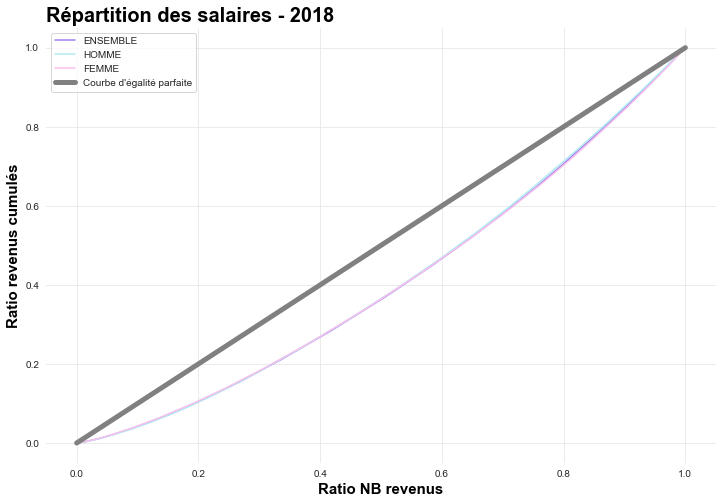

In [41]:
# Visualiser les courbes de Lorenz par sexe
plt.figure(figsize=(12,8))

sns.lineplot(x=xaxis,y=lorenz,label="ENSEMBLE",color="#9F7EF2")
sns.lineplot(x=xaxis_men,y=lorenz_men,label="HOMME",color="#B1E9F0")
sns.lineplot(x=xaxis_wom,y=lorenz_wom,label="FEMME",color="#F7C1EC")

sns.lineplot(x=[0, 1],y=[0, 1], color='grey',lw=5,label="Courbe d'égalité parfaite")

plt.ylabel("Ratio revenus cumulés", **conf_graph["label_style"])
plt.xlabel("Ratio NB revenus", **conf_graph["label_style"])
plt.title("Répartition des salaires - 2018", **conf_graph["title_style"])
plt.legend()

plt.savefig('14_line_lorenz.png')
plt.show()

In [42]:
# Comparatif sous forme de tableau des indices de Gini
ar = np.array([[gini,gini_men,gini_wom]])

df_comp = pd.DataFrame(ar, index = ['Indice de Gini'], columns = ['Ensemble', 'Hommes', 'Femmes'])
df_comp

,Ensemble,Hommes,Femmes
Indice de Gini,0.190783,0.18691,0.190892


# III.b) Répartition des revenus

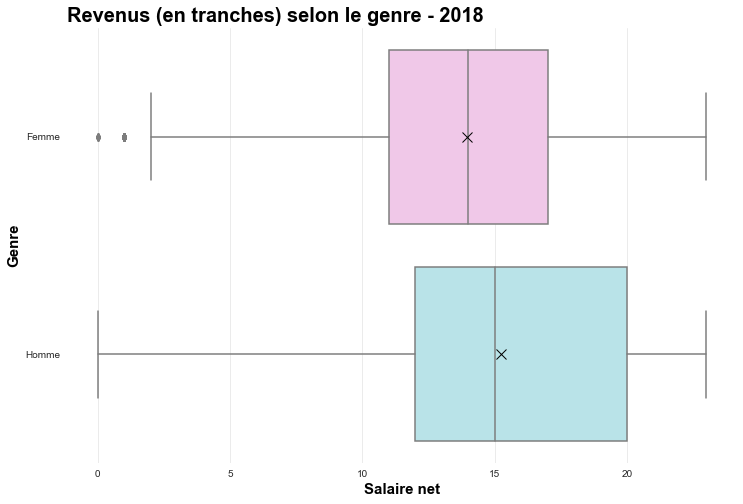

In [43]:
# Répartition des revenus selon le genre
df_graph=df_salarie.copy()
df_graph=df_graph.sort_values("Sexe")

plt.figure(figsize=(12,8))
sns.boxplot(x = 'Salaire_net', y = 'Sexe', data=df_graph, palette=["#F7C1EC","#B1E9F0"],
            showmeans=True,meanprops={"marker": "x","markeredgecolor": "black","markersize": "10"})

plt.title("Revenus (en tranches) selon le genre - 2018", **conf_graph["title_style"])
plt.xlabel('Salaire net', **conf_graph["label_style"])
plt.ylabel('Genre', **conf_graph["label_style"])

plt.savefig('15_box_revenu_sexe.png')
plt.show()

del df_graph

In [44]:
temp_wom.describe().round(2)

,Salaire_net,Age
count,1036231.00,1036231.00
mean,13.96,40.33
std,4.67,12.34
min,0.00,16.00
25%,11.00,30.00
50%,14.00,40.00
75%,17.00,50.00
max,23.00,69.00


In [45]:
temp_men.describe().round(2)

,Salaire_net,Age
count,1139413.00,1139413.00
mean,15.24,39.88
std,4.99,12.37
min,0.00,16.00
25%,12.00,30.00
50%,15.00,40.00
75%,20.00,50.00
max,23.00,69.00


In [46]:
# Calcul du % de femmes selon tranche de salaire
x = "Salaire_net"
y = "Sexe"

sal = df_salarie[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

sal["Ensemble"] = sal["Femme"] + sal["Homme"]
sal["% de femmes"] = (100*(sal["Femme"] / sal["Ensemble"])).round(2)
sal

Sexe,Femme,Homme,Ensemble,% de femmes
Salaire_net,,,,
0,7,9,16,43.75
1,275,199,474,58.02
2,874,1096,1970,44.37
3,5179,5319,10498,49.33
4,8898,8982,17880,49.77
5,20330,20649,40979,49.61
6,18056,17985,36041,50.10
7,38687,36090,74777,51.74
8,44164,36664,80828,54.64


In [47]:
#Oneway ANOVA via STATSMODELS 
model=ols('Salaire_net ~ Sexe',data=df_salarie).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq         df             F  PR(>F)
Sexe      8.824474e+05        1.0  37659.197067     0.0
Residual  5.098063e+07  2175642.0           NaN     NaN


In [48]:
st.f_oneway(df_salarie['Salaire_net'][df_salarie['Sexe'] == 'Homme'],
            df_salarie['Salaire_net'][df_salarie['Sexe'] == 'Femme'])

F_onewayResult(statistic=37659.19706678251, pvalue=0.0)

- p_value <0,05 = confirme que la différence entre les moyennes des populations femmes et hommes sont statistiquement signifcatives. H0 est rejetée au niveau de test 5% : les moyennes de chaque population ne sont pas égales.

## III.c) Répartition des revenus selon l'âge

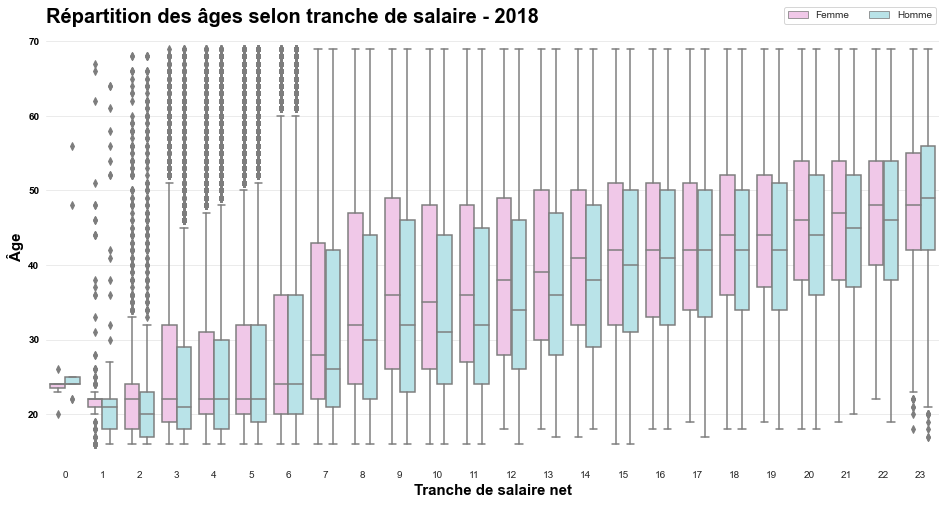

In [49]:
df_graph=df_salarie.copy()
df_graph=df_graph.sort_values(["Sexe","Salaire_net"])

plt.figure(figsize=(16,8))

sns.boxplot(x="Salaire_net", y="Age", hue="Sexe", palette=["#F7C1EC","#B1E9F0"], data=df_graph)

plt.title("Répartition des âges selon tranche de salaire - 2018", **conf_graph["title_style"])
plt.xlabel("Tranche de salaire net", **conf_graph["label_style"])
plt.ylabel("Âge", **conf_graph["label_style"])
plt.yticks(**conf_graph["tick_style"])
plt.legend(bbox_to_anchor =(0.82, 1), ncol = 2)

plt.savefig('16_box_revenu_age_sexe.png')
plt.show()

del df_graph

# ------------------------------------------------OU------------------------------------------------------

In [50]:
df_sal=df_salarie.copy()

df_sal.loc[df_sal["Salaire_net"] == 0, "Salaire_net"] = "0_ Moins de 200 euros"
df_sal.loc[df_sal["Salaire_net"].isin([1,2,3]), "Salaire_net"] = "1_ 200 à 1499 euros"
df_sal.loc[df_sal["Salaire_net"].isin([4,5,6,7]), "Salaire_net"] = "2_ 1 500 à 5 999 euros"
df_sal.loc[df_sal["Salaire_net"].isin([8,9,10,11]), "Salaire_net"] = "3_ 6 000 à 13 999 euros"
df_sal.loc[df_sal["Salaire_net"].isin([12,13,14,15]), "Salaire_net"] = "4_ 14 000 à 21 999 euros"
df_sal.loc[df_sal["Salaire_net"].isin([16,17,18,19]), "Salaire_net"] = "5_ 22 000 à 29 999 euros"
df_sal.loc[df_sal["Salaire_net"].isin([20,21,22]), "Salaire_net"] = "6_ 30 000 à 49 999 euros"
df_sal.loc[df_sal["Salaire_net"] == 23, "Salaire_net"] = "7_ 50 000 euros et plus"

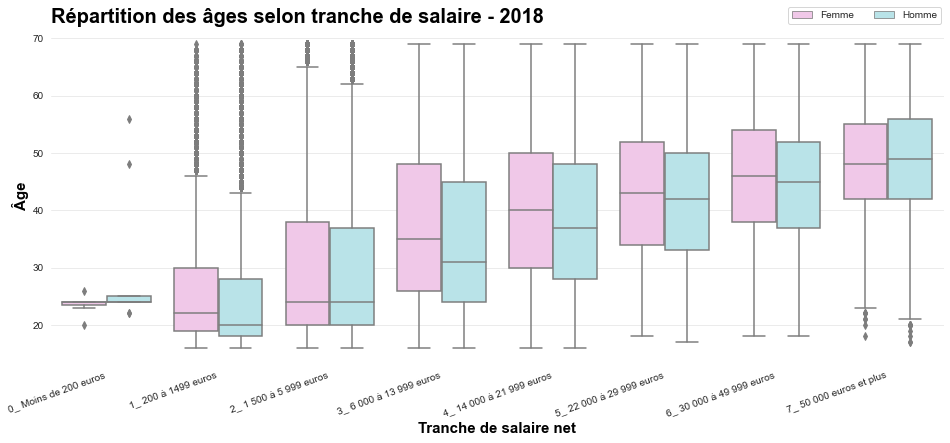

In [51]:
df_graph=df_sal.copy()
df_graph=df_graph.sort_values(["Sexe","Salaire_net"])

plt.figure(figsize=(16,8))
plt.gcf().subplots_adjust(bottom=0.3)

sns.boxplot(x="Salaire_net", y="Age",hue="Sexe", palette=["#F7C1EC","#B1E9F0"],data=df_graph)

plt.title("Répartition des âges selon tranche de salaire - 2018", **conf_graph["title_style"])
plt.xlabel("Tranche de salaire net", **conf_graph["label_style"])
plt.ylabel("Âge", **conf_graph["label_style"])
plt.xticks(**conf_graph["rotation"])
plt.legend(bbox_to_anchor =(0.82, 1), ncol = 2)

plt.savefig('17_box_revenu_tranche_age_sexe.png')
plt.show()

del df_graph

In [52]:
# Calcul du % de femmes selon tranche de salaire
x = "Salaire_net"
y = "Sexe"

sal = df_sal[[x,y]].pivot_table(index=x,columns=y,aggfunc=len).fillna(0).copy().astype(int)

sal["Ensemble"] = sal["Femme"] + sal["Homme"]
sal["% de femmes"] = (100*(sal["Femme"] / sal["Ensemble"])).round(2)
sal

Sexe,Femme,Homme,Ensemble,% de femmes
Salaire_net,,,,
0_ Moins de 200 euros,7,9,16,43.75
1_ 200 à 1499 euros,6328,6614,12942,48.90
2_ 1 500 à 5 999 euros,85971,83706,169677,50.67
3_ 6 000 à 13 999 euros,222454,168263,390717,56.93
4_ 14 000 à 21 999 euros,350987,334033,685020,51.24
5_ 22 000 à 29 999 euros,204556,255006,459562,44.51
6_ 30 000 à 49 999 euros,133548,207464,341012,39.16
7_ 50 000 euros et plus,32380,84318,116698,27.75


In [53]:
del temp_men
del temp_wom
del sal
del df_sal